In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
train=pd.read_csv("train.csv")

In [34]:
print(train.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [35]:
print(train.shape)

(114000, 21)


In [36]:
train.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [38]:
train.rename(columns={'track_name': 'name'}, inplace=True)
train.rename(columns={'track_genre': 'genres'}, inplace=True)
train

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [39]:
duplicates = train[train.duplicated(subset=['name', 'artists'], keep=False)]
duplicates

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.28900,0.000000,0.1890,0.666,98.017,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113881,113881,1myRTCOm1pPlykQTiwbEMy,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,False,0.473,0.4740,...,-9.175,1,0.0558,0.39500,0.000000,0.1630,0.251,140.746,4,world-music
113882,113882,7lYdF3SC4SCJPg5kROvXWx,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,False,0.473,0.4740,...,-9.175,1,0.0558,0.39500,0.000000,0.1630,0.251,140.746,4,world-music
113917,113917,4r0ETFFJMBSQ0Z3ntuMDP2,Hillsong Worship;Mi-kaisha Rose,Never Walk Alone (Live),Never Walk Alone - Live,41,348619,False,0.420,0.5530,...,-8.049,1,0.0332,0.14100,0.000000,0.1030,0.214,143.804,4,world-music
113951,113951,54o7m2sWPTagySKiaPPpT2,Passion;Kristian Stanfill,More Like Jesus (Live),More Like Jesus - Live,44,338694,False,0.404,0.6760,...,-5.468,1,0.0354,0.02740,0.000000,0.3520,0.163,144.056,3,world-music


In [40]:
train.drop_duplicates(subset=['name', 'artists'], keep='first', inplace=True)
train

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [41]:
toptrain=train.head(1000)
toptrain

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1054,31p1i3XDY9W8ORcDXmA17Q,BaianaSystem,Invisível,Invisível,36,195040,False,0.725,0.6180,...,-9.842,0,0.0460,0.3250,0.000133,0.3840,0.479,112.681,5,afrobeat
1055,1055,3vo1FajskK841e2gcxHpqB,Los Pirañas,Toma Tu Jabón Kapax,"Lambada de Oceanía, África y América",33,246613,False,0.522,0.6720,...,-9.058,0,0.0390,0.0785,0.418000,0.0864,0.750,155.833,4,afrobeat
1056,1056,3Nb27pwwcFmJhP6INhri4z,BaianaSystem;Orquestra Afrosinfônica,Fogo (Versão Estendida),Fogo (Versão Estendida),36,250354,False,0.455,0.7380,...,-6.826,0,0.0358,0.1610,0.067800,0.0996,0.335,125.351,5,afrobeat
1057,1057,0seSNElilcmQH2T0gY5zyY,BaianaSystem;Makavelli;Jaymitta,ATO 1: Navio Pirata,Nauliza,35,220670,False,0.618,0.9450,...,-4.490,0,0.1120,0.0372,0.003230,0.2570,0.760,169.967,4,afrobeat


In [42]:
features = ['danceability', 'energy', 'loudness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = train[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


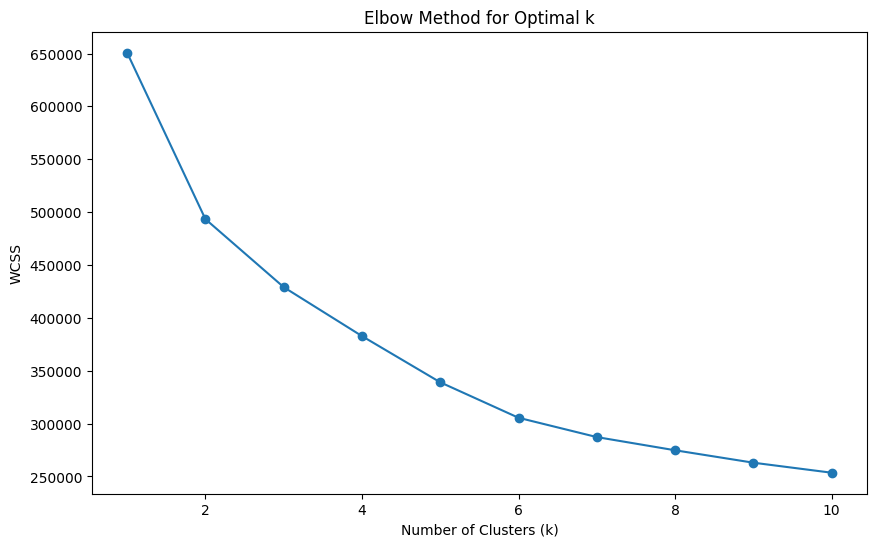

In [43]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [44]:
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# train['cluster'] = kmeans.fit_predict(X_scaled)







# Next method
# One-hot encode genres
genres_encoded = pd.get_dummies(train['genres'], prefix='genre')

# Concatenate one-hot encoded genres with other features
X_with_genres = pd.concat([X, genres_encoded], axis=1)

# Scale the updated feature set
scaler = StandardScaler()
X_scaled_with_genres = scaler.fit_transform(X_with_genres)

# Perform clustering again with the updated features
kmeans = KMeans(n_clusters=3, random_state=42)
train['cluster'] = kmeans.fit_predict(X_scaled_with_genres)



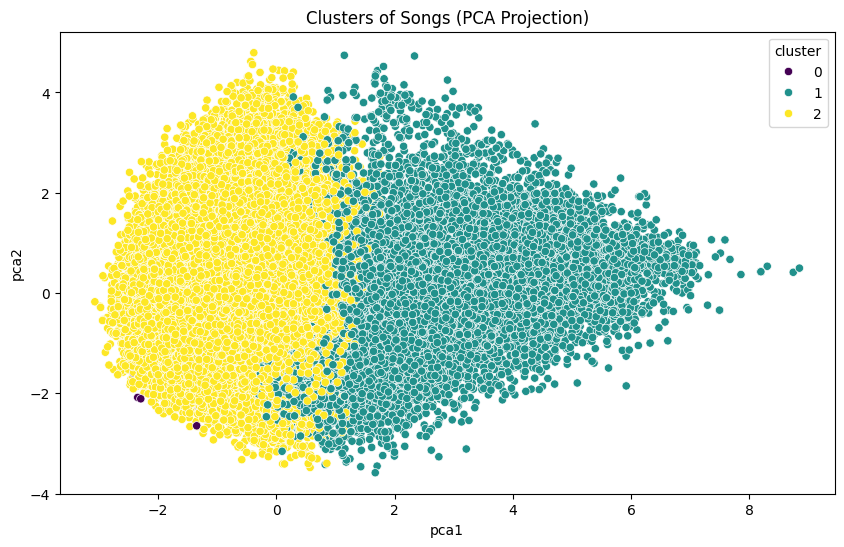

In [45]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=train, x='popularity', y='danceability', hue='cluster', palette='viridis')
# plt.title('Clusters of Songs')
# plt.show()


# PCA METHOD
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
train['pca1'] = principal_components[:, 0]
train['pca2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Clusters of Songs (PCA Projection)')
plt.show()



In [46]:
# METHOD1
# def recommend_from_cluster(song_name, data):
    
#     if song_name not in data['name'].values:
#         print("Song not found in the dataset.")
#         return
   
#     song_cluster = data[data['name'] == song_name]['cluster'].values[0]
    
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
# #     recommendations = recommendations.sort_values(by='popularity', ascending=False).head(5)
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'popularity','genres']]



# METHOD2
# def recommend_from_cluster(song_name, data):
#     if song_name not in data['name'].values:
#         print("Song not found in the dataset.")
#         return

#     # Get the cluster of the given song
#     song_cluster = data[data['name'] == song_name]['cluster'].values[0]
    
#     # Filter songs belonging to the same cluster
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     # Exclude the song being recommended
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
    
#     # Sort by another feature (e.g., 'danceability', 'energy')
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'danceability','genres']]



# # METHOD3
# def recommend_from_cluster(song_name, artist_name, data):
#     # Find the song with the specific name and artist
#     song_row = data[(data['name'] == song_name) & (data['artists'] == artist_name)]
    
#     if song_row.empty:
#         print("Song not found in the dataset.")
#         return
    
#     song_cluster = song_row['cluster'].values[0]
    
#     # Get recommendations from the same cluster
#     same_cluster_songs = data[data['cluster'] == song_cluster]
    
#     recommendations = same_cluster_songs[same_cluster_songs['name'] != song_name]
#     recommendations = recommendations.head(5)
    
#     return recommendations[['name', 'artists', 'popularity','genres']]




# METHOD 4
def recommend_from_cluster(song_name, artist_name, data):
    # Find the song with the specific name and artist
    song_row = data[(data['name'] == song_name) & (data['artists'] == artist_name)]
    
    if song_row.empty:
        print("Song not found in the dataset.")
        return
    
    song_cluster = song_row['cluster'].values[0]
    song_genre = song_row['genres'].values[0]
    
    # Get songs from the same cluster
    same_cluster_songs = data[data['cluster'] == song_cluster]
    
    # Filter songs with the same genre
    recommendations = same_cluster_songs[same_cluster_songs['genres'] == song_genre]
    recommendations = recommendations[same_cluster_songs['name'] != song_name].head(5)
    
    return recommendations[['name', 'artists', 'genres']]



In [47]:
# # Example: Get recommendations for "Shape of You"
# recommendations = recommend_from_cluster('Bad Liar', train)
# recommendations


# # for method 3
# # Example usage: Get recommendations for "Bad Liar" by Imagine Dragons
# recommendations = recommend_from_cluster('Bad Liar', 'Imagine Dragons', train)
# recommendations


# for METHOD 4
# Example usage for Imagine Dragons
recommendations = recommend_from_cluster('Can\'t Help Falling In Love', 'Kina Grannis', train)
print(recommendations)



               name                               artists    genres
1  Ghost - Acoustic                          Ben Woodward  acoustic
2    To Begin Again                Ingrid Michaelson;ZAYN  acoustic
4           Hold On                      Chord Overstreet  acoustic
6     Say Something  A Great Big World;Christina Aguilera  acoustic
9            Hunger                        Ross Copperman  acoustic


C:\Users\saksh\AppData\Local\Temp\ipykernel_6452\1892202649.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendations = recommendations[same_cluster_songs['name'] != song_name].head(5)


In [48]:
bad_liar_row = train[train['name'] == 'Bad Liar']
bad_liar_row

,Unnamed: 0,track_id,artists,album_name,name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,cluster,pca1,pca2
13,13,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62,248448,False,0.691,0.234,...,0.7770,0.0,0.1200,0.2090,87.103,4,acoustic,1,1.379363,-1.292325
359,359,7vg5fesQdq5I7Z7XGdyJd5,Roses & Frey,Bad Liar,Bad Liar,50,226877,False,0.596,0.195,...,0.9260,0.0,0.1390,0.1760,82.114,4,acoustic,1,2.294583,-1.184336
20294,20294,1WrMD6on4zuCXVrYp5o8io,Selena Gomez,Queda poco para la PAES,Bad Liar,0,214647,False,0.965,0.414,...,0.1890,0.0,0.0767,0.7290,121.032,4,dance,2,-0.930978,-2.274438
91018,91018,2RSHsoi04658QL5xgQVov3,Imagine Dragons,Origins (Deluxe),Bad Liar,81,260773,False,0.383,0.637,...,0.0722,0.0,0.3680,0.0827,177.913,4,rock,2,-0.412781,2.038951
